In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import six

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER


%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure5_voyages', flotilla_dir=flotilla_dir)

2017-01-15 12:20:06	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure5_voyages/datapackage.json
2017-01-15 12:20:06	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-15 12:20:59 	Initializing Study
2017-01-15 12:20:59 	Initializing Predictor configuration manager for Study
2017-01-15 12:20:59	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-15 12:20:59	Added ExtraTreesClassifier to default predictors
2017-01-15 12:20:59	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-15 12:20:59	Added ExtraTreesRegressor to default predictors
2017-01-15 12:20:59	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-15 12:20:59	Added GradientBoostingClassifier to default predictors
2017-01-15 12:20:59	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-15 12:20:59	Added GradientBoostingRegressor to default predictors
2017-01-15 12:20:59 	Loading metadata
2017-01-15 12:20:59	Loading expression data
2017-0

In [30]:
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [31]:
figure_folder = '{}/03_large_voyages'.format(folder)


In [32]:
rm -rf $figure_folder

In [33]:
mkdir $figure_folder

In [34]:
study.supplemental.voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
0,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,0.033333,0.033333,iPSC,NPC,$\nwarrow$,iPSC-NPC,included,included
1,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,0.033333,0.033333,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
2,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,0.000000,0.000000,NPC,MN,NaN,NPC-MN,included,included
3,isoform1=junction:chr10:101476219-101480743:-|...,0.166667,-0.041667,0.171796,iPSC,NPC,$\searrow$,iPSC-NPC,included,bimodal
4,isoform1=junction:chr10:101476219-101480743:-|...,0.052632,0.072368,0.089483,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal


In [35]:
study.phenotype_transitions

[(u'iPSC', u'NPC'), (u'NPC', u'MN')]

In [36]:
transition_order = ['iPSC-NPC', 'iPSC-MN']

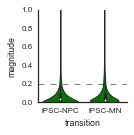

In [37]:
g = sns.factorplot(x='transition', y='magnitude', size=2,
               data=study.supplemental.voyages, kind='violin', cut=True, 
               order=transition_order, color='green', linewidth=1)
for ax in g.axes.flat:
    xmin, xmax = ax.get_xlim()
    ax.hlines(0.2, xmin, xmax, linestyle='--', color='k', linewidth=0.5)
    ax.set(ylim=(0, 1))
    ax.locator_params(nbins=5, axis='y')
g.savefig('{}/magnitude_violinplot_cutoff.pdf'.format(figure_folder))

In [38]:
voyage_cutoff = 0.2

In [39]:
large_voyages = study.supplemental.voyages.query('(magnitude > @voyage_cutoff) & (transition in @transition_order)')
print(large_voyages.shape)
large_voyages.head()

(1233, 10)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
6,isoform1=junction:chr10:101507148-101514285:+|...,0.291498,-0.089069,0.304802,iPSC,NPC,$\searrow$,iPSC-NPC,bimodal,bimodal
8,isoform1=junction:chr10:101995522-101997778:-|...,0.181818,-0.150568,0.236069,iPSC,NPC,$\searrow$,iPSC-NPC,included,bimodal
96,isoform1=junction:chr10:105152224-105156165:-|...,0.527101,0.000000,0.527101,iPSC,NPC,$\searrow$,iPSC-NPC,excluded,excluded
97,isoform1=junction:chr10:105152224-105156165:-|...,0.431579,0.018182,0.431962,iPSC,MN,$\nearrow$,iPSC-MN,excluded,excluded
114,isoform1=junction:chr10:1089334-1094803:-|isof...,-0.031230,0.207222,0.209562,iPSC,NPC,$\nwarrow$,iPSC-NPC,uncategorized,included


In [40]:
large_voyages_directions = large_voyages.groupby(['transition', 'group1_modality', 'direction']).size().reset_index()
large_voyages_directions = large_voyages_directions.rename(columns={0: 'n_exons'})
print(large_voyages_directions.shape)
large_voyages_directions.head()

(32, 4)


,transition,group1_modality,direction,n_exons
0,iPSC-MN,bimodal,$\nearrow$,13
1,iPSC-MN,bimodal,$\nwarrow$,108
2,iPSC-MN,bimodal,$\searrow$,139
3,iPSC-MN,bimodal,$\swarrow$,1
4,iPSC-MN,excluded,$\nearrow$,15


In [41]:
large_voyages_directions.groupby(['direction']).size()

direction
$\nearrow$     8
$\nwarrow$    10
$\searrow$     8
$\swarrow$     6
dtype: int64

In [42]:
ARROW_ORDER = [r'$\nearrow$', r'$\searrow$', r'$\swarrow$', r'$\nwarrow$']

In [43]:
modality_vs_direction_kws = dict(row='group1_modality', col='direction', hue='group2_modality', 
                                 hue_order=MODALITY_ORDER,
                                 row_order=MODALITY_ORDER, col_order=ARROW_ORDER, palette=MODALITY_PALETTE)
modality_vs_modality_kws = dict(row='group1_modality', col='group2_modality', hue='group2_modality', 
                                hue_order=MODALITY_ORDER,
                                 row_order=MODALITY_ORDER, col_order=MODALITY_ORDER, palette=MODALITY_PALETTE)
direction_vs_modality_kws = dict(row='direction', col='group2_modality', hue='group1_modality', 
                                 hue_order=MODALITY_ORDER,
                                 row_order=ARROW_ORDER, col_order=MODALITY_ORDER, palette=MODALITY_PALETTE)

facet_kwargs = dict(modality_vs_direction_kws=modality_vs_direction_kws, 
                    modality_vs_modality_kws=modality_vs_modality_kws, 
                    direction_vs_modality_kws=direction_vs_modality_kws)

In [44]:
large_voyages_directions.head()

,transition,group1_modality,direction,n_exons
0,iPSC-MN,bimodal,$\nearrow$,13
1,iPSC-MN,bimodal,$\nwarrow$,108
2,iPSC-MN,bimodal,$\searrow$,139
3,iPSC-MN,bimodal,$\swarrow$,1
4,iPSC-MN,excluded,$\nearrow$,15


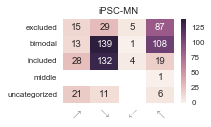

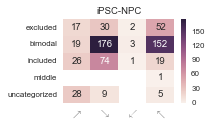

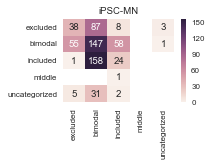

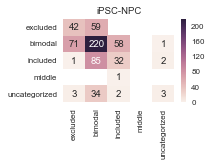

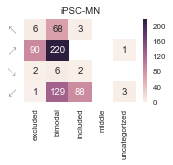

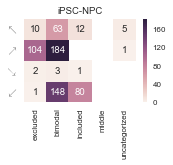

In [45]:

for name, kwargs in facet_kwargs.items():
    large_voyages_sizes = large_voyages.groupby(['transition', kwargs['row'], kwargs['col']]).size().reset_index()
    large_voyages_sizes = large_voyages_sizes.rename(columns={0: 'n_exons'})

    for transition, df in large_voyages_sizes.groupby('transition'):
        df2d = df.pivot(index=kwargs['row'], columns=kwargs['col'], values='n_exons')
        df2d = df2d.loc[kwargs['row_order'], kwargs['col_order']]
        mask = df2d.isnull()
        df2d = df2d.fillna(0)
        df2d = df2d.astype(int)

        fig, ax = plt.subplots(figsize=(2.5, 1.5))


        sns.heatmap(df2d, annot=True, fmt='d', mask=mask)
        ax.set(#xticks=[], 
               #yticks=[], 
            xlabel='', ylabel='', title=transition)
#         fig.tight_layout()
        g.savefig('{folder}/large_voyages_{row}_vs_{col}_{transition}_heatmap.pdf'.format(
                folder=figure_folder, transition=transition, **kwargs))
    


## Arrowplots of the voyages

In [46]:
import bonvoyage

In [47]:
waypoints = study.supplemental.waypoints.rename(columns={"Unnamed: 1": 'event_id'})
waypoints = waypoints.set_index('event_id', append=True)
waypoints.index = waypoints.index.swaplevel(0, 1)
waypoints = waypoints.sort_index()
waypoints.head()

0  \
event_id                                           phenotype             
isoform1=junction:chr10:100189400-100190327:-|i... iPSC       0.882353   
isoform1=junction:chr10:100193849-100195391:-|i... iPSC       0.176471   
isoform1=junction:chr10:101163392-101165512:-|i... MN         0.000000   
                                                   NPC        0.000000   
                                                   iPSC       0.000000   

                                                                     1  
event_id                                           phenotype            
isoform1=junction:chr10:100189400-100190327:-|i... iPSC       0.117647  
isoform1=junction:chr10:100193849-100195391:-|i... iPSC       0.823529  
isoform1=junction:chr10:101163392-101165512:-|i... MN         1.000000  
                                                   NPC        1.000000  
                                                   iPSC       0.966667

In [48]:
waypoints_tidy = study.supplemental.waypoints.rename(columns={"Unnamed: 1": 'event_id', '0': 'nmf_0', '1': 'nmf_1'})
waypoints_tidy = waypoints_tidy.reset_index()
waypoints_tidy.head()

,phenotype,event_id,nmf_0,nmf_1
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,1.000000
1,MN,isoform1=junction:chr10:101476219-101480743:-|...,0.052632,0.947368
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,0.000000,1.000000
3,MN,isoform1=junction:chr10:102283687-102286731:-|...,0.000000,1.000000
4,MN,isoform1=junction:chr10:102746733-102747069:-|...,0.133333,0.866667


In [49]:
waypoints_tidy['phenotype'] = pd.Categorical(waypoints_tidy['phenotype'], 
                                             categories=study.phenotype_order, ordered=True)
waypoints_tidy.head()

,phenotype,event_id,nmf_0,nmf_1
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,0.000000,1.000000
1,MN,isoform1=junction:chr10:101476219-101480743:-|...,0.052632,0.947368
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,0.000000,1.000000
3,MN,isoform1=junction:chr10:102283687-102286731:-|...,0.000000,1.000000
4,MN,isoform1=junction:chr10:102746733-102747069:-|...,0.133333,0.866667


In [50]:
waypoints_tidy = waypoints_tidy.sort_values('phenotype')
waypoints_tidy.head()

,phenotype,event_id,nmf_0,nmf_1
28671,iPSC,isoform1=junction:chrY:2822039-2843135:+|isofo...,0.0,0.800000
20234,iPSC,isoform1=junction:chr17:65735127-65739594:+|is...,0.0,1.000000
20233,iPSC,isoform1=junction:chr17:65732871-65733623:+|is...,0.0,1.000000
20232,iPSC,isoform1=junction:chr17:65732140-65733186:+|is...,0.0,0.981818
20231,iPSC,isoform1=junction:chr17:65720310-65730478:+|is...,0.0,1.000000


In [51]:
def arrowplot(x, y, waypoints, event_id, phenotype, transition, data, **kwargs):
    ax = plt.gca()
    phenotypes = data[transition].values[0].split('-')

    # PLot a phantom line for the legend to work
    ax.plot(0, 0, color=kwargs['color'])
    for event in data[event_id]:
        rows = (waypoints[event_id] == event) & (waypoints[phenotype].isin(phenotypes))
        df = waypoints.loc[rows]
#         if not isinstance(df[phenotype], pd.Categorical):
#             df[phenotype] = pd.Categorical(df[phenotype], categories=phenotypes, ordered=True)
        df = df.sort_values(phenotype)
#         print(df.shape)
#         df = waypoints.ix[event].ix[[phenotype1, phenotype2]].dropna()
        if df.shape[0] != 2:
            continue
        x1, x2 = df.loc[:, x].values
        y1, y2 = df.loc[:, y].values
        dx = x2 - x1
        dy = y2 - y1
        ax.arrow(x1, y1, dx, dy, #head_width=0.005, head_length=0.005, #fc='k', ec='k',
                 #alpha=0.25, 
                 **kwargs)

# g = sns.FacetGrid(large_voyages, col='direction', row='group1_modality', hue='group2_modality', size=3)
# g.set(xticks=[], yticks=[])
# g.map_dataframe(arrowplot, 'nmf_0', 'nmf_1', waypoints=waypoints_tidy, event_id='event_id', 
#                 phenotype='phenotype', transition='transition')

In [52]:
from anchor import MODALITY_PALETTE
from __future__ import print_function

In [53]:
MODALITY_ORDER

['excluded', 'bimodal', 'included', 'middle', 'uncategorized']

In [ ]:
sns.set(context='paper', style='white')

In [ ]:
vlim = (0, 1.05)

# row = 'direction'
# col = 'group2_modality'
# hue = 'group1_modality'

for name, kwargs in facet_kwargs.items():
    print(name)
    for transition, df in large_voyages.groupby('transition'):
        print('\t', transition)
        g = sns.FacetGrid(df, size=1, **kwargs)
        g.map_dataframe(arrowplot, 'nmf_0', 'nmf_1', waypoints=waypoints_tidy, event_id='event_id', 
                        phenotype='phenotype', transition='transition', 
                        linewidth=1, head_width=0.1, head_length=0.1, alpha=0.5)
        g.set(xticks=[], yticks=[], xlim=vlim, ylim=vlim, ylabel='', xlabel='')
    #     g.set_xlabels(bonvoyage.visualize.NEAR_ZERO)
    #     g.set_ylabels(MODALITY_ORDER)
        g.set_titles('')
    #     g.set_titles('{row_name}')
    #     g.fig.suptitle(transition)
        g.fig.tight_layout(w_pad=0)
        sns.despine(offset=3)
        g.savefig('{folder}/large_voyages_{row}_vs_{col}_{transition}_arrows.pdf'.format(
                folder=figure_folder, transition=transition, **kwargs))

modality_vs_direction_kws
	 iPSC-MN
	

## FacetGrid Delta X and Delta Y

### Scatterplot

In [ ]:
vmin = -1
vmax = 1
vlim = vmin, vmax

for name, kwargs in facet_kwargs.items():
    print(name)
    for transition, df in large_voyages.groupby('transition'):
        print('\t', transition)
        g = sns.FacetGrid(df, size=1, **kwargs)
        g.map_dataframe(plt.scatter, '$\Delta x$', '$\Delta y$', 
                        alpha=0.5, linewidth=0.5, edgecolor='#262626')
        g.set(xticks=[], yticks=[], xlim=vlim, ylim=vlim, ylabel='', xlabel='')
        g.set_titles('')
        for ax in g.axes.flat:
            ax.hlines(0, vmin, vmax, color='k', linewidth=0.5)
            ax.vlines(0, vmin, vmax, color='k', linewidth=0.5)

        g.fig.tight_layout(w_pad=0)
        sns.despine(bottom=True, left=True)
        g.savefig('{folder}/large_voyages_{row}_vs_{col}_{transition}_scatter.pdf'.format(
                folder=figure_folder, transition=transition, **kwargs))

### Hexbin

In [ ]:
import matplotlib as mpl

In [ ]:
vmin = -1
vmax = 1
vlim = vmin, vmax

extent = vmin, vmax, vmin, vmax


def hexbin(x, y, *args, **kwargs):
    kwargs.pop('color')
    return plt.hexbin(x, y, *args, **kwargs)

row = 'group1_modality'
col = 'group2_modality'

for name, kwargs in facet_kwargs.items():
    print(name)
    for transition, df in large_voyages.groupby('transition'):
        print('\t', transition)
        g = sns.FacetGrid(df, size=1, **kwargs)
        vmax = df.groupby([row, col]).size().max()

        g.map(hexbin, '$\Delta x$', '$\Delta y$', extent=extent, cmap='YlGnBu', 
              mincnt=1, gridsize=10, vmax=vmax, vmin=1,
              norm=mpl.colors.LogNorm(),
              linewidth=0.25, edgecolor='#262626')
        g.set(xticks=[], yticks=[], xlim=vlim, ylim=vlim, ylabel='', xlabel='')

        for ax in g.axes.flat:
            ax.hlines(0, vmin, vmax, color='k', linewidth=0.5)
            ax.vlines(0, vmin, vmax, color='k', linewidth=0.5)


            
        #     g.set_xlabels(bonvoyage.visualize.NEAR_ZERO)
    #     g.set_ylabels(MODALITY_ORDER)
        g.set_titles('')
    #     g.set_titles('{row_name}')
    #     g.fig.suptitle(transition)
        g.fig.tight_layout(w_pad=0)
        sns.despine(bottom=True, left=True)
        g.savefig('{folder}/large_voyages_{row}_vs_{col}_{transition}_hexbin.pdf'.format(
                folder=figure_folder, transition=transition, **kwargs))
        
        # Plot colorbar too
        fig_colorbar, ax_colorbar = plt.subplots(figsize=(1, 1.5))
        plt.colorbar(g.axes[0][0].collections[0], cax=ax_colorbar, 
                     orientation='vertical',  label='Count')
#                      ticks=[1, 2, 3, 4])#mpl.ticker.MaxNLocator(4))
#         ax_colorbar.yaxis.set_ticklabels(colorbar_ticklabels)
        fig_colorbar.tight_layout()
        fig_colorbar.savefig('{folder}/large_voyages{row}_vs_{col}_{transition}_hexbin_colorbar.pdf'.format(
                folder=figure_folder, transition=transition, **kwargs))
